#Linear Regression of Times Series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data Loading
data = np.loadtxt('alabama.txt', delimiter=' ')
years = data[:, 0]
enrollments = data[:, 1]

In [ ]:
# Calculate the mean of x and y
mean_x = np.mean(years)
mean_y = np.mean(enrollments)

# Calculate the deviations from the mean
dev_x = years - mean_x
dev_y = enrollments - mean_y

# Calculate the slope (beta1)
slope = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)

# Calculate the intercept (beta0)
intercept = mean_y - slope * mean_x

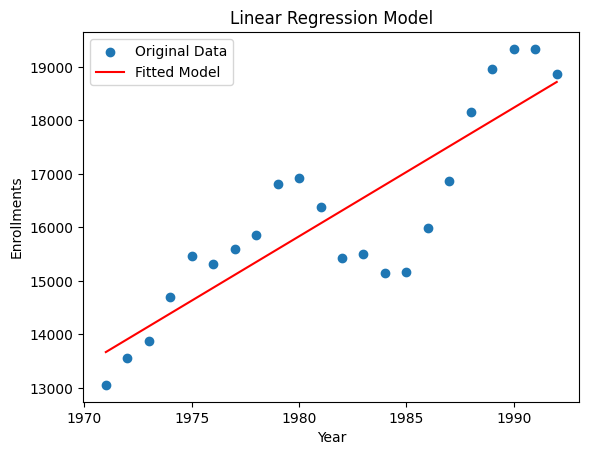

In [ ]:
# Plot the data
plt.scatter(years, enrollments, label='Original Data')

# Plot the fitted regression line
plt.plot(years, slope * years + intercept, color='red', label='Fitted Model')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.title('Linear Regression Model')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Prediction
desired_year = 2050
predicted_enrollment = slope * desired_year + intercept
# Print the predicted enrollment for the desired year
print(f'Predicted number of students for year {desired_year}: {predicted_enrollment}')

Predicted number of students for year 2050: 32667.600225861068


Linear regression is not a good choice for modelling the time-series, it assumes a linear relationship between the year and number of enrolled students. It was unable to capture the decline in enrolment between the year 1980 and 1985. It is sometimes unable to capture underlying patterns effectively.

#Fuzzy prediction system  for time series using (simplified) Song's method.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Step 1: Data Loading and Preprocessing
data = np.loadtxt('alabama.txt', delimiter=' ')
years = data[:, 0]
enrollments = data[:, 1]

In [18]:
# Step 2: Fuzzification of the Enrollments
NUM_SETS = 10
min_enroll, max_enroll = enrollments.min(), enrollments.max()
fuzzy_edges = np.linspace(min_enroll, max_enroll, NUM_SETS +2)
fuzzy_spacing = fuzzy_edges[1] - fuzzy_edges[0]
fuzzy_enrollments = enrollments > fuzzy_edges[1:-1, None] + fuzzy_spacing
fuzzy_enrollments = np.argmin(fuzzy_enrollments, axis=0) + (fuzzy_enrollments[-1, :] == 1) * (NUM_SETS-1)

In [19]:
# Step 3: Rule Generation
rules = {}
for i in range(len(fuzzy_enrollments)-1):
  origin_set = fuzzy_enrollments[i]
  next_set = fuzzy_enrollments[i+1]
  rules[origin_set] = rules.get(origin_set, set()).union([next_set])

In [20]:
# Step 4: Prediction and Defuzzification
prediction_years = []
predicted_enrollments = []
for i in range (len(data) - 1):
  prediction_years.append(years[i+1])
  fuzzy_now = fuzzy_enrollments[i]
  successives = rules[fuzzy_now]

  successives_peaks = [fuzzy_edges[x + 1] for x in successives]
  defuzz = np.mean(successives_peaks)
  predicted_enrollments.append(defuzz)

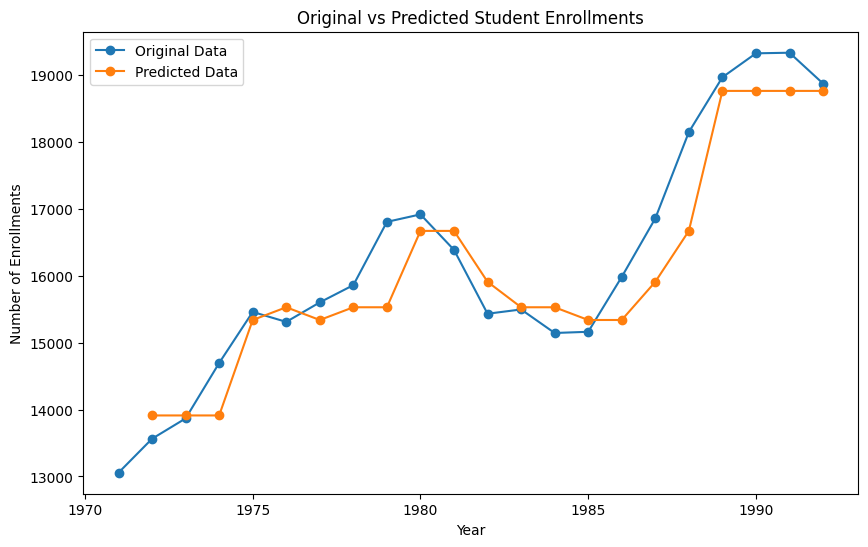

In [21]:
# Step 5: Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, enrollments, label='Original Data', marker='o')
plt.plot(prediction_years, predicted_enrollments, label='Predicted Data', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.title('Original vs Predicted Student Enrollments')
plt.legend()
plt.show()


The prediction accuracy initially improves as the number of linguistic terms(Number of sets) increases, with the model achieving a satisfactory fit when set to 100 linguistic terms. However, the optimal number of linguistic terms is context-dependent and varies based on the data characteristics.

A low number of linguistic terms, such as 1, results in a simplistic model that produces a straight line, failing to capture the nuances of the original data. Conversely, an excessively high number of terms, like 1000, leads to overfitting, where the model precisely mimics the original data but struggles to generalize to unseen data, becoming overly sensitive to noise.

Therefore, selecting the appropriate number of linguistic terms is crucial for balancing model complexity and predictive accuracy. By incrementally adjusting the number of terms, the model can achieve an optimal balance between complexity and generalization, ultimately improving its predictive performance.